# 美国2012年总统候选人政治献金数据分析

导入包

In [1]:
import numpy as np
import pandas as pd

方便大家操作，将月份和参选人以及所在政党进行定义

months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

读取文件

In [2]:
pd.read_excel('./usa_elect/contb_01.csv')
pd.read_excel('./usa_elect/contb_02.csv')
pd.read_excel('./usa_elect/contb_03.csv')

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'cand_nm,'

In [3]:
import os

In [4]:
root = './usa_elect/'

party_df = ""
contdf_list = []
for fname in  os.listdir(root):
    fpath = os.path.join(root, fname)
    if fname.endswith('.csv'):
        contdf_list.append(pd.read_csv(fpath))
    elif fname.endswith('.xlsx'):
        party_df = pd.read_excel(fpath, index_col=0)
    else:
        print('其他文件不读取')

In [5]:
len(contdf_list)

3

In [6]:
contb = pd.concat(contdf_list, ignore_index=True)

查看文件样式以及基本信息

In [22]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001733 entries, 0 to 1001732
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


In [23]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [24]:
party_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 2 columns):
names    13 non-null object
party    13 non-null object
dtypes: object(2)
memory usage: 312.0+ bytes


In [25]:
party_df.head()

,names,party
0,"Bachmann, Michelle",Republican
1,"Romney, Mitt",Republican
2,"Obama, Barack",Democrat
3,"Roemer, Charles E. 'Buddy' III",Reform
4,"Pawlenty, Timothy",Republican


使用map函数+字典，新建一列各个候选人所在党派party

In [7]:
party_df

,names,party
0,"Bachmann, Michelle",Republican
1,"Romney, Mitt",Republican
2,"Obama, Barack",Democrat
3,"Roemer, Charles E. 'Buddy' III",Reform
4,"Pawlenty, Timothy",Republican
5,"Johnson, Gary Earl",Libertarian
6,"Paul, Ron",Republican
7,"Santorum, Rick",Republican
8,"Cain, Herman",Republican
9,"Gingrich, Newt",Republican


In [8]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [9]:
contb_part = pd.merge(left=contb, right=party_df, left_on='cand_nm', right_on='names', how='left')

查看单独一行，是否加上了'party'一列

In [10]:
contb_part.head(1)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,names,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,"Bachmann, Michelle",Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [11]:
# 查看由多少个党派参与了竞选
contb_part.party.unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

## 查看党派的支持度，可以查看支持的次数， 可以查看支持的钱数

使用value_counts()函数，统计party列中各个元素出现次数

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

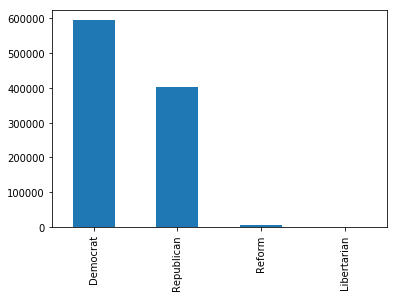

In [13]:
contb_part.party.value_counts().plot(kind='bar')

使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [15]:
contb_part.head(2)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,names,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,"Bachmann, Michelle",Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,"Bachmann, Michelle",Republican


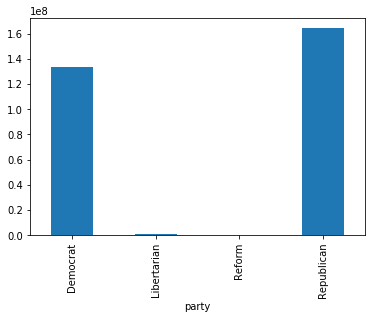

In [14]:
contb_part.groupby('party')['contb_receipt_amt'].sum().plot(kind='bar')

查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [16]:
contb_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1001732
Data columns (total 9 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
names                1001733 non-null object
party                1001733 non-null object
dtypes: float64(1), object(8)
memory usage: 76.4+ MB


In [20]:
import datetime

In [21]:
datetime.datetime(2022,2,11)

datetime.datetime(2022, 2, 11, 0, 0)

In [22]:
# pandas to_datetime函数，可以批量转换符合时间格式的字符串为时间类型（Timestamp）
pd.to_datetime('2022-2-11')

Timestamp('2022-02-11 00:00:00')

In [25]:
pd.to_datetime('20-六月-2011')

ParserError: Unknown string format: 20-六月-2011

In [17]:
# 备注：20-JUN-11是一个标准欧式时间格式日-月-年，只要是标准的时间格式字符串，都可以适用pd.to_datetime()进行批量转换
# 假设20-JUN-11是不符合标准时间格式的，因为业务表的记录过程中，难免会出现一些人为的错误操作
# 经验提示：我们在设计原始数据表的时候，为了方便时间类型的转换，应该指定标准的时间格式
contb_part.contb_receipt_dt

0          20-JUN-11
1          23-JUN-11
2          05-JUL-11
3          01-AUG-11
4          20-JUN-11
             ...    
1001728    29-SEP-11
1001729    30-SEP-11
1001730    29-SEP-11
1001731    30-SEP-11
1001732    31-AUG-11
Name: contb_receipt_dt, Length: 1001733, dtype: object

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [26]:
month_dict = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

In [29]:
# '20-JUN-11' --> '2011-06-20'
def transform_date_string(x):
    # 判断接收的x是否为一个字符串对象
    if isinstance(x, str):
        day, mon, year = x.split('-')
        month = month_dict[mon]
        return '20%d-%d-%d'%(int(year), int(month), int(day))

In [30]:
transform_date_string('20-JUN-11')

'2011-6-20'

In [34]:
date_string = contb_part.contb_receipt_dt.map(transform_date_string)

In [36]:
contb_part.contb_receipt_dt = pd.to_datetime(date_string)

查看是否转换成功

In [37]:
contb_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1001732
Data columns (total 9 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null datetime64[ns]
names                1001733 non-null object
party                1001733 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 76.4+ MB


将时间转换为时间数据类型  
根据时间进行排序

In [39]:
contb_part.sort_values(by='contb_receipt_dt', inplace=True)

得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [40]:
contb_part.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,names,party
922063,"Cain, Herman","TRIBBLE, JAMES",TX,NONE,RETIRED,1000.0,2011-01-01,"Cain, Herman",Republican
922062,"Cain, Herman","STOLTENBERG, WAYNE",TX,CINCO RESOURCES,CFO,5200.0,2011-01-01,"Cain, Herman",Republican
923362,"Cain, Herman","MAREK, JOHN",WI,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,"Cain, Herman",Republican
922064,"Cain, Herman","DAVIS, JEREMY S MR.",TX,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,"Cain, Herman",Republican
923363,"Cain, Herman","SIDNEY, SCOTT",WI,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,"Cain, Herman",Republican


In [42]:
group_df = contb_part.groupby(by=['contb_receipt_dt','party'])['contb_receipt_amt'].sum()

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [51]:
piovt_table = group_df.unstack()
piovt_table.fillna(value=0.0, inplace=True)

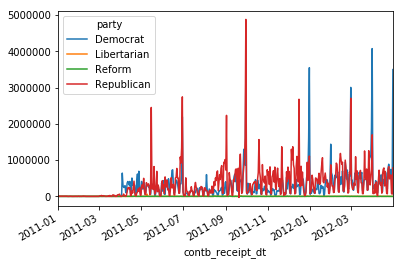

In [52]:
piovt_table.plot(kind='line')

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

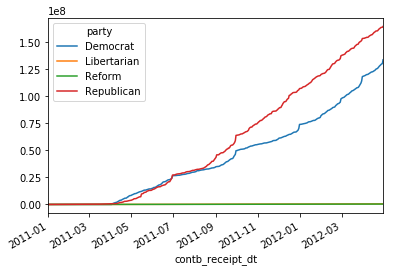

In [55]:
piovt_table.cumsum().plot(kind='line')

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [57]:
piovt_table.T

contb_receipt_dt,2011-01-01,2011-01-03,2011-01-04,2011-01-12,2011-01-13,2011-01-14,2011-01-15,2011-01-16,2011-01-17,2011-01-18,...,2012-04-21,2012-04-22,2012-04-23,2012-04-24,2012-04-25,2012-04-26,2012-04-27,2012-04-28,2012-04-29,2012-04-30
party,,,,,,,,,,,,,,,,,,,,,
Democrat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,324834.43,210774.49,771284.52,887405.45,697150.70,537115.38,745269.95,479677.34,349744.69,3499159.38
Libertarian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,5785.00,1000.00,500.00,2745.12,1805.00,350.00,0.00,0.00,0.00
Reform,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,100.00,510.00,25.00,100.00,25.00,560.00,110.00,0.00,35.00
Republican,8600.0,4800.0,5000.0,4150.0,4000.0,6000.0,500.0,750.0,500.0,4800.0,...,81083.38,71269.44,742814.09,819865.08,482124.68,505311.33,593983.56,80759.16,61421.02,787702.81


使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [59]:
piovt_table.stack()

contb_receipt_dt  party      
2011-01-01        Democrat             0.00
                  Libertarian          0.00
                  Reform               0.00
                  Republican        8600.00
2011-01-03        Democrat             0.00
                                    ...    
2012-04-29        Republican       61421.02
2012-04-30        Democrat       3499159.38
                  Libertarian          0.00
                  Reform              35.00
                  Republican      787702.81
Length: 1864, dtype: float64

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [62]:
contb_part.groupby(by=['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()

cand_nm             contbr_occupation             
Bachmann, Michelle  --                                  75.00
                    100% DISABLED VETERAN             1869.50
                    100% DISABLED VIETNAM VETERAN      236.25
                    A/C AND HEAT                       250.00
                    ACADEMIC EMPLOYMENT SPECIALIST      25.00
                                                       ...   
Santorum, Rick      WRITER/PROFESSOR                   910.00
                    X-RAY TECHNICIAN                  2500.00
                    XRAY TECH                          380.00
                    YOUTH MINISTER                     475.00
                    YOUTH MINISTRY                     250.00
Name: contb_receipt_amt, Length: 59313, dtype: float64

查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [68]:
condtion = contb_part.contbr_occupation == 'DISABLED VETERAN'

good_man = contb_part.loc[condtion, 'cand_nm'].value_counts()

把索引变成列,Series.reset_index()

In [72]:
good_man_df = good_man.reset_index()
good_man_df.columns = ['cont_nm', 'cand_nm']
good_man_df

,cont_nm,cand_nm
0,"Obama, Barack",97
1,"Paul, Ron",46
2,"Santorum, Rick",6
3,"Cain, Herman",3
4,"Gingrich, Newt",1
5,"Roemer, Charles E. 'Buddy' III",1


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [76]:
max_amt = contb_part.contb_receipt_amt.max()

condition = contb_part.contb_receipt_amt == max_amt

In [80]:
contb_part.loc[condition]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,names,party
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NaN,NaN,2014490.51,2012-02-29,"Obama, Barack",Democrat


In [82]:
max_amt

2014490.51

In [83]:
# 适用query 查询
contb_part.query('contb_receipt_amt == %f'%(max_amt))
# contb_part.query('contb_receipt_amt == 2014490.51')

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,names,party
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,IL,NaN,NaN,2014490.51,2012-02-29,"Obama, Barack",Democrat
